**Workflow stages**

1. Question or problem definition
2. Acquire Data
3. Wrangle, prepare and clean the data
4. Analyze, identity patterns and explore the data
5. Visualize on Dashboard

# Question and problem definition

Analyze some insights and visualize them

- Determine the most common crimes in Boston 

- Determine the most dangerous time of year and in a day in Boston 

- Identify the places (District and Street) where crimes are most likely to be committed 

- Crimes related to Shooting analysis 

- Incidents in Boston during Covid pandemic analysis 

- Crimes at Northeastern University area analysis 

# Acquire Data

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv('boston_crime_2018_2021.csv')
df.head()

<ipython-input-2-3fac7e71c333>:1: DtypeWarning: Columns (0,2,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('boston_crime_2018_2021.csv')


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,4/30/18 9:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,3/6/18 8:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,10/31/18 12:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,4/9/18 8:43,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,1/1/18 0:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"


In [3]:
# Getting the number of observations and attributes of the dataset
df.shape

(328687, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328687 entries, 0 to 328686
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      328687 non-null  object 
 1   OFFENSE_CODE         328687 non-null  int64  
 2   OFFENSE_CODE_GROUP   98888 non-null   object 
 3   OFFENSE_DESCRIPTION  328687 non-null  object 
 4   DISTRICT             325693 non-null  object 
 5   REPORTING_AREA       328687 non-null  object 
 6   SHOOTING             230201 non-null  object 
 7   OCCURRED_ON_DATE     328687 non-null  object 
 8   YEAR                 328687 non-null  int64  
 9   MONTH                328687 non-null  int64  
 10  DAY_OF_WEEK          328687 non-null  object 
 11  HOUR                 328687 non-null  int64  
 12  UCR_PART             98868 non-null   object 
 13  STREET               326391 non-null  object 
 14  Lat                  322258 non-null  float64
 15  Long             

In [5]:
df.isna().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP     229799
OFFENSE_DESCRIPTION         0
DISTRICT                 2994
REPORTING_AREA              0
SHOOTING                98486
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART               229819
STREET                   2296
Lat                      6429
Long                     6429
Location                    0
dtype: int64

# Cleaning dataset

## Drop unused columns: incident_number, offense_code and area

We drop 3 unused columns, which are `INCIDENT_NUMBER`, `OFFENSE_CODE` and `REPORTING_AREA` from the original dataset

In [6]:
df.drop(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'REPORTING_AREA'], axis = 1, inplace = True)
df.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,Investigate Person,INVESTIGATE PERSON,B3,NaN,4/30/18 9:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,Larceny,LARCENY ALL OTHERS,E18,NaN,3/6/18 8:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,Harassment,HARASSMENT,E5,NaN,10/31/18 12:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,Harassment,HARASSMENT,A1,NaN,4/9/18 8:43,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,Property Lost,PROPERTY - MISSING,D4,NaN,1/1/18 0:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"


## Rename column names

Because the column names are quite long and all-caps, we rename column names to make them shorter and more simple 

In [7]:
rename = {'OFFENSE_CODE_GROUP': 'Group',
          'OFFENSE_DESCRIPTION': 'Description',
          'DISTRICT':'District_number',
          'SHOOTING': 'Shooting',
          'OCCURRED_ON_DATE': 'Date',
          'YEAR': 'Year', 
          'MONTH': 'Month',
          'DAY_OF_WEEK': 'Day',
          'HOUR': 'Hour',
          'UCR_PART': 'UCR_Part',
          'STREET': 'Street'
         }
df.rename(columns = rename, inplace = True)
df.head()

,Group,Description,District_number,Shooting,Date,Year,Month,Day,Hour,UCR_Part,Street,Lat,Long,Location
0,Investigate Person,INVESTIGATE PERSON,B3,NaN,4/30/18 9:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,Larceny,LARCENY ALL OTHERS,E18,NaN,3/6/18 8:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,Harassment,HARASSMENT,E5,NaN,10/31/18 12:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,Harassment,HARASSMENT,A1,NaN,4/9/18 8:43,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,Property Lost,PROPERTY - MISSING,D4,NaN,1/1/18 0:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"


## Reformatting values in Description column

Group column has quite a lot missing values, we have to take a look on that column. But first, we should look at the **Description** column to reformat of them, as we may fill missing values of group column based on Description column

We reformat all values in Description columns to lower case and remove leading and trailing whitespaces. 

In [8]:
df['Description'] = df['Description'].str.lower().str.strip()
df['Description']

0                                        investigate person
1                                        larceny all others
2                                                harassment
3                                                harassment
4                                        property - missing
                                ...                        
328682                      fraud - false pretense / scheme
328683                          noisy party/radio-no arrest
328684                        sick/injured/medical - person
328685    warrant arrest - boston warrant (must be suppl...
328686                                   investigate person
Name: Description, Length: 328687, dtype: object

## Filling missing values for Group column

We use map function to map the values of `Description` column to values of `Group` column

In [9]:
df2 = df[['Description', 'Group']].dropna()
dict_group = dict(df2.values)
rows_group = df['Group'].isna() 
df.loc[rows_group,'Group'] = df[rows_group]['Description'].map(dict_group)
df[['Description', 'Group']]

,Description,Group
0,investigate person,Investigate Person
1,larceny all others,Larceny
2,harassment,Harassment
3,harassment,Harassment
4,property - missing,Property Lost
...,...,...
328682,fraud - false pretense / scheme,Fraud
328683,noisy party/radio-no arrest,Assembly or Gathering Violations
328684,sick/injured/medical - person,Medical Assistance
328685,warrant arrest - boston warrant (must be suppl...,NaN


After filling, the number of missing values in Group column dropped from 229,799 to 41,823

In [10]:
df['Group'].isna().sum()

41823

In 41,823 missing values in group column, there are 10,232 values which should be `sick assist`. However , there are no 'sick assist' value in Group column from the original data yet. So, we will refill `sick assist` for Group column manually.

In [11]:
check = df[df['Group'].isna()]['Description'].value_counts().reset_index()
check.rename(columns = {'index':'Description', 'Description':'Number of values'}, inplace = True)
check

,Description,Number of values
0,sick assist,10232
1,property - lost/ missing,4598
2,m/v accident - property damage,4333
3,drugs - possession/ sale/ manufacturing/ use,3537
4,harassment/ criminal harassment,2584
...,...,...
56,migrated report - embezzlement,1
57,biological threats,1
58,migrated report - kidnapping,1
59,evidence tracker incidents,1


In [12]:
df[df['Description'] == 'sick assist'].count()

Group                  0
Description        10232
District_number    10147
Shooting           10232
Date               10232
Year               10232
Month              10232
Day                10232
Hour               10232
UCR_Part               0
Street             10194
Lat                10232
Long               10232
Location           10232
dtype: int64

In [13]:
# Fill 'sick assist' to Group manually
row_f = (df['Description'] == 'sick assist') & (df['Group'].isna())
df.loc[row_f, 'Group'] = 'sick assist'
df[df['Description'] == 'sick assist'][['Group', 'Description']]

,Group,Description
99112,sick assist,sick assist
99148,sick assist,sick assist
99168,sick assist,sick assist
99235,sick assist,sick assist
99249,sick assist,sick assist
...,...,...
328627,sick assist,sick assist
328637,sick assist,sick assist
328648,sick assist,sick assist
328661,sick assist,sick assist


After filling `sick assist`, there are still 31,591 missing values in Group column, accounting for 9.61% of total values. So we just drop all observations having missing values in Group column.

In [14]:
df['Group'].isna().sum()

31591

In [15]:
tmp = df['Group'].isna().sum()/len(df)*100
print(f'{round(tmp,2)}%')

9.61%


Now, our dataset has 297,096 observations in total

In [16]:
# Drop observations with nan values in group column
df.dropna(subset='Group', inplace = True)
df.shape

(297096, 14)

## Create 'Class' column where values in Group column are at lower-level of values in Class column

We create a table, in which values in Group column are lower level than values in Class column. For example: Auto theft, License Plate Related Incidents, Larceny from Motor vehicle,..belong to `Motor` class in Class column.

In [17]:
grouping = pd.read_csv('Grouping.csv',  index_col = 0)
grouping

,Group,Class
0,Investigate Person,Investigation
1,Larceny,Burglary
2,Harassment,Harassment
3,Property Lost,Burglary
4,Fraud,Fraud
...,...,...
57,Prostitution,Miscellaneous
58,HUMAN TRAFFICKING,Miscellaneous
59,HOME INVASION,Burglary
60,Explosives,Fire


Next, we add the class column to the existing dataset and rearrange the columns

In [18]:
df = pd.merge(left = df, right = grouping, how = 'left',on = 'Group')
df.head()

,Group,Description,District_number,Shooting,Date,Year,Month,Day,Hour,UCR_Part,Street,Lat,Long,Location,Class
0,Investigate Person,investigate person,B3,NaN,4/30/18 9:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)",Investigation
1,Larceny,larceny all others,E18,NaN,3/6/18 8:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)",Burglary
2,Harassment,harassment,E5,NaN,10/31/18 12:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)",Harassment
3,Harassment,harassment,A1,NaN,4/9/18 8:43,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)",Harassment
4,Property Lost,property - missing,D4,NaN,1/1/18 0:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",Burglary


In [19]:
column_list = ['Class', 'Group', 'Description', 'District_number', 'Street', 'Shooting', 'Date', 'Year', 'Month', 'Day', 'Hour', 'UCR_Part', 'Lat', 'Long', 'Location']
df = df[column_list]
df.head()

,Class,Group,Description,District_number,Street,Shooting,Date,Year,Month,Day,Hour,UCR_Part,Lat,Long,Location
0,Investigation,Investigate Person,investigate person,B3,HAZLETON ST,NaN,4/30/18 9:00,2018,4,Monday,9,Part Three,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,Burglary,Larceny,larceny all others,E18,HYDE PARK AVE,NaN,3/6/18 8:00,2018,3,Tuesday,8,Part One,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,Harassment,Harassment,harassment,E5,PRIMROSE ST,NaN,10/31/18 12:00,2018,10,Wednesday,12,Part Two,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,Harassment,Harassment,harassment,A1,ATLANTIC AVE,NaN,4/9/18 8:43,2018,4,Monday,8,Part Two,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,Burglary,Property Lost,property - missing,D4,COMMONWEALTH AVE,NaN,1/1/18 0:00,2018,1,Monday,0,Part Three,42.353522,-71.072838,"(42.35352153, -71.07283786)"


## Drop observations which have missing values in District_number column

Because the number of missing values in District_number column accounts for just 0.86% of total length of dataset. So we just drop all the observations which have missing values in District_number column.

In [20]:
check_na = df['District_number'].isna().sum()/len(df)*100
print(f'{round(check_na, 2)}%')

0.86%


Now, our dataset has 294,530 observations in total

In [21]:
df.dropna(subset = 'District_number', inplace = True)
df.shape

(294530, 15)

## Mapping District

The original dataset uses the District code to represent for District. However, the readers may find difficult to understand a specified district number representing for which district. So, we will map each district code to a respective name of district. 

First, we use the data in which each district number representing a name of district.

Then, we use map function to map name of district to the dataset.

Finally, we drop the `district_number` column and rearrange the columns.

In [22]:
district = pd.read_excel('District_mapping.xlsx')
district

,District_number,District
0,A1,Downtown
1,A15,Charlestown
2,A7,East Boston
3,B2,Roxbury
4,B3,Mattapan
5,C6,South Boston
6,C11,Dorchester
7,D4,South End
8,D14,Brighton
9,E5,West Roxbury


In [23]:
dict_district = dict(district.values)
df['District'] = df['District_number'].map(dict_district)
df.head()

,Class,Group,Description,District_number,Street,Shooting,Date,Year,Month,Day,Hour,UCR_Part,Lat,Long,Location,District
0,Investigation,Investigate Person,investigate person,B3,HAZLETON ST,NaN,4/30/18 9:00,2018,4,Monday,9,Part Three,42.279971,-71.095534,"(42.27997063, -71.09553354)",Mattapan
1,Burglary,Larceny,larceny all others,E18,HYDE PARK AVE,NaN,3/6/18 8:00,2018,3,Tuesday,8,Part One,42.269224,-71.120853,"(42.26922388, -71.12085347)",Hyde Park
2,Harassment,Harassment,harassment,E5,PRIMROSE ST,NaN,10/31/18 12:00,2018,10,Wednesday,12,Part Two,42.290765,-71.130211,"(42.29076521, -71.13021098)",West Roxbury
3,Harassment,Harassment,harassment,A1,ATLANTIC AVE,NaN,4/9/18 8:43,2018,4,Monday,8,Part Two,42.355264,-71.050988,"(42.35526402, -71.05098788)",Downtown
4,Burglary,Property Lost,property - missing,D4,COMMONWEALTH AVE,NaN,1/1/18 0:00,2018,1,Monday,0,Part Three,42.353522,-71.072838,"(42.35352153, -71.07283786)",South End


In [24]:
df.drop(columns = 'District_number', inplace = True)
df.head()

,Class,Group,Description,Street,Shooting,Date,Year,Month,Day,Hour,UCR_Part,Lat,Long,Location,District
0,Investigation,Investigate Person,investigate person,HAZLETON ST,NaN,4/30/18 9:00,2018,4,Monday,9,Part Three,42.279971,-71.095534,"(42.27997063, -71.09553354)",Mattapan
1,Burglary,Larceny,larceny all others,HYDE PARK AVE,NaN,3/6/18 8:00,2018,3,Tuesday,8,Part One,42.269224,-71.120853,"(42.26922388, -71.12085347)",Hyde Park
2,Harassment,Harassment,harassment,PRIMROSE ST,NaN,10/31/18 12:00,2018,10,Wednesday,12,Part Two,42.290765,-71.130211,"(42.29076521, -71.13021098)",West Roxbury
3,Harassment,Harassment,harassment,ATLANTIC AVE,NaN,4/9/18 8:43,2018,4,Monday,8,Part Two,42.355264,-71.050988,"(42.35526402, -71.05098788)",Downtown
4,Burglary,Property Lost,property - missing,COMMONWEALTH AVE,NaN,1/1/18 0:00,2018,1,Monday,0,Part Three,42.353522,-71.072838,"(42.35352153, -71.07283786)",South End


In [25]:
column_list = ['Class','Group', 'Description', 'District', 'Street', 'Shooting', 'Date', 'Year', 'Month', 'Day', 'Hour', 'UCR_Part', 'Lat', 'Long', 'Location']
df = df[column_list]
df.head()

,Class,Group,Description,District,Street,Shooting,Date,Year,Month,Day,Hour,UCR_Part,Lat,Long,Location
0,Investigation,Investigate Person,investigate person,Mattapan,HAZLETON ST,NaN,4/30/18 9:00,2018,4,Monday,9,Part Three,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,Burglary,Larceny,larceny all others,Hyde Park,HYDE PARK AVE,NaN,3/6/18 8:00,2018,3,Tuesday,8,Part One,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,Harassment,Harassment,harassment,West Roxbury,PRIMROSE ST,NaN,10/31/18 12:00,2018,10,Wednesday,12,Part Two,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,Harassment,Harassment,harassment,Downtown,ATLANTIC AVE,NaN,4/9/18 8:43,2018,4,Monday,8,Part Two,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,Burglary,Property Lost,property - missing,South End,COMMONWEALTH AVE,NaN,1/1/18 0:00,2018,1,Monday,0,Part Three,42.353522,-71.072838,"(42.35352153, -71.07283786)"


## Convert Date column to datetime

In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

## Cleaning Shooting column

Let's see how much of the data is null. 33% of values in the Shooting column consists of null values. Assuming these mean no, we can replace it with 0. (1 = there is shooting, 0 = no shooting)

In [27]:
tmp = df['Shooting'].isna().sum()/len(df)*100
print(f'{round(tmp,2)}%')

33.21%


Except missing values, there are 5 different types of values in `Shooting` column, which are 'Y', 0 and 1 in string and 0 and 1 in integer. So we will use map method to change Y and 1 in string to integer 1, 0 in string to integer 0. Besides, we fill missing values in this column with 0 (means no shooting)

In [28]:
df['Shooting'].unique()

array([nan, 'Y', '0', '1', 0, 1], dtype=object)

In [29]:
df['Shooting'] = df['Shooting'].map({'Y': 1, '0': 0, '1': 1})
df['Shooting'].unique()

array([nan,  1.,  0.])

In [30]:
df['Shooting'].fillna(0, inplace = True)

In [31]:
df.head()

,Class,Group,Description,District,Street,Shooting,Date,Year,Month,Day,Hour,UCR_Part,Lat,Long,Location
0,Investigation,Investigate Person,investigate person,Mattapan,HAZLETON ST,0.0,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,Burglary,Larceny,larceny all others,Hyde Park,HYDE PARK AVE,0.0,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,Harassment,Harassment,harassment,West Roxbury,PRIMROSE ST,0.0,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,Harassment,Harassment,harassment,Downtown,ATLANTIC AVE,0.0,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,Burglary,Property Lost,property - missing,South End,COMMONWEALTH AVE,0.0,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,42.353522,-71.072838,"(42.35352153, -71.07283786)"


## Filling missing values for UCR_Part column

Similar to filling missing values for Group column, we use values of Description column to map values for UCR_Part column

In [32]:
df3 = df[['Description','UCR_Part']].dropna()
dict_ucr = dict(df3.values)
rows_ucr = df['UCR_Part'].isna()
df.loc[rows_ucr, 'UCR_Part'] = df[rows_ucr]['Description'].map(dict_ucr)
df.head()

,Class,Group,Description,District,Street,Shooting,Date,Year,Month,Day,Hour,UCR_Part,Lat,Long,Location
0,Investigation,Investigate Person,investigate person,Mattapan,HAZLETON ST,0.0,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,Burglary,Larceny,larceny all others,Hyde Park,HYDE PARK AVE,0.0,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,Harassment,Harassment,harassment,West Roxbury,PRIMROSE ST,0.0,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,Harassment,Harassment,harassment,Downtown,ATLANTIC AVE,0.0,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,Burglary,Property Lost,property - missing,South End,COMMONWEALTH AVE,0.0,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,42.353522,-71.072838,"(42.35352153, -71.07283786)"


After filling, the number of missing values in UCR_Part column dropped from 229,819 to 10,254

In [33]:
df['UCR_Part'].isna().sum()

10169

## Cleaning Lat and Long columns

Besides 6,354 missing values in Lat and Long column, there are some values of 0 and -1, which are considered as missing values. So, we will refill missing values,values of 0 and -1 in Lat and Long columns by average values of Lat and Long for each District. 

In [34]:
df_lat = df[(df['Lat']!=0) & (df['Lat'] != -1)]
Lats = df_lat.groupby('District').agg({'Lat':'mean'}).reset_index()
Lats = dict(Lats.values)
Lats

{'Brighton': 42.35016831870827,
 'Charlestown': 42.37612950606061,
 'Dorchester': 42.300233855860874,
 'Downtown': 42.357339778582485,
 'East Boston': 42.37676148845933,
 'External': 42.32230877624031,
 'Hyde Park': 42.26230033679548,
 'Jamaica Plain': 42.31378454994435,
 'Mattapan': 42.28713704745055,
 'Roxbury': 42.322057835341475,
 'South Boston': 42.3340424286138,
 'South End': 42.343305267818025,
 'West Roxbury': 42.282342313980486}

In [35]:
df_long = df[(df['Long']!=0) & (df['Long'] != -1)]

Longs = df_long.groupby('District').agg({'Long':'mean'}).reset_index()
Longs = dict(Longs.values)
Longs

{'Brighton': -71.14305106758947,
 'Charlestown': -71.06214202386404,
 'Dorchester': -71.0633837521593,
 'Downtown': -71.06107300124866,
 'East Boston': -71.0314812849667,
 'External': -71.0834710407752,
 'Hyde Park': -71.11881619452372,
 'Jamaica Plain': -71.10614674413998,
 'Mattapan': -71.08566297988594,
 'Roxbury': -71.0841565455918,
 'South Boston': -71.05318157737874,
 'South End': -71.07971220780891,
 'West Roxbury': -71.14247254475569}

In [36]:
def mapping_lat(row, lat_dict = Lats):
    if (row['Lat'] == 0) or (row['Lat'] == -1) or (pd.isna(row['Lat'])):
        lat = lat_dict[row['District']]
    else:
        lat = row['Lat']
    return lat

df['Lat'] = df.apply(mapping_lat, axis = 1)
df['Lat']

0         42.279971
1         42.269224
2         42.290765
3         42.355264
4         42.353522
            ...    
297091    42.307289
297092    42.333679
297093    42.282342
297094    42.283902
297095    42.331320
Name: Lat, Length: 294530, dtype: float64

In [37]:
def mapping_long(row, long_dict = Longs):
    if (row['Long'] == 0) or (row['Long'] == -1) or (pd.isna(row['Long'])):
        long = long_dict[row['District']]
    else:
        long = row['Long']
    return long

df['Long'] = df.apply(mapping_long, axis = 1)
df['Long']

0        -71.095534
1        -71.120853
2        -71.130211
3        -71.050988
4        -71.072838
            ...    
297091   -71.058499
297092   -71.091878
297093   -71.142473
297094   -71.130863
297095   -71.044080
Name: Long, Length: 294530, dtype: float64

## Cleaning Location column

Values in Location column are mapped from Lat and Long values. So, they had missing values, (0,0) and (-1,-1) from the earlier values of Lat and Long column. Now, we are going to drop the 'old' Location column, and create a new one with the same name, and get the values from Lat and Long columns that we just cleaned.

In [38]:
df.drop(columns = 'Location', inplace = True)
df.head()

,Class,Group,Description,District,Street,Shooting,Date,Year,Month,Day,Hour,UCR_Part,Lat,Long
0,Investigation,Investigate Person,investigate person,Mattapan,HAZLETON ST,0.0,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,42.279971,-71.095534
1,Burglary,Larceny,larceny all others,Hyde Park,HYDE PARK AVE,0.0,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,42.269224,-71.120853
2,Harassment,Harassment,harassment,West Roxbury,PRIMROSE ST,0.0,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,42.290765,-71.130211
3,Harassment,Harassment,harassment,Downtown,ATLANTIC AVE,0.0,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,42.355264,-71.050988
4,Burglary,Property Lost,property - missing,South End,COMMONWEALTH AVE,0.0,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,42.353522,-71.072838


In [39]:
df['Location'] = '('  + df['Lat'].astype(str) + ',' + df['Long'].astype(str) + ')'
df.head() 

,Class,Group,Description,District,Street,Shooting,Date,Year,Month,Day,Hour,UCR_Part,Lat,Long,Location
0,Investigation,Investigate Person,investigate person,Mattapan,HAZLETON ST,0.0,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,42.279971,-71.095534,"(42.27997063,-71.09553354)"
1,Burglary,Larceny,larceny all others,Hyde Park,HYDE PARK AVE,0.0,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,42.269224,-71.120853,"(42.26922388,-71.12085347)"
2,Harassment,Harassment,harassment,West Roxbury,PRIMROSE ST,0.0,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,42.290765,-71.130211,"(42.29076521,-71.13021098)"
3,Harassment,Harassment,harassment,Downtown,ATLANTIC AVE,0.0,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,42.355264,-71.050988,"(42.35526402,-71.05098788)"
4,Burglary,Property Lost,property - missing,South End,COMMONWEALTH AVE,0.0,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,42.353522,-71.072838,"(42.35352153,-71.07283786)"


Finally, our dataset has 294,530 observations and 15 attributes. We will use this dataset for analysis and visualization.

In [40]:
df.shape

(294530, 15)

In [41]:
df.to_csv('Boston_Crime_final.csv')

# Visualiaze data

## Top ten crimes

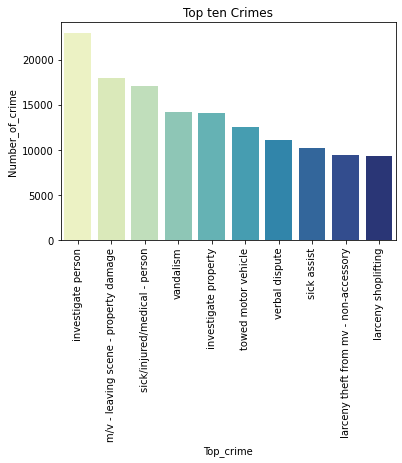

In [42]:
top_crime = pd.DataFrame(df['Description'].value_counts().head(10)).reset_index()
top_crime.rename(columns = {'index':'Top_crime', 'Description':'Number_of_crime'}, inplace = True)

sns.barplot(data = top_crime, x = 'Top_crime', y = 'Number_of_crime', palette = 'YlGnBu')
plt.xticks(rotation = 90)
plt.title('Top ten Crimes')
plt.show()

## Top five crime groups

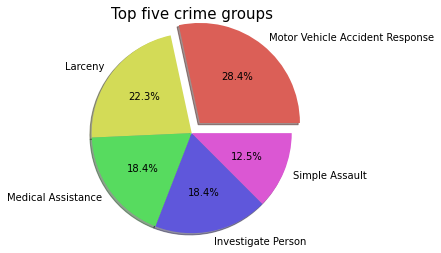

In [43]:
df_group = df.groupby('Group').agg({'Description':'count'}).reset_index().sort_values(by='Description', 
                                                                                      ascending=False)
top_five_group = df_group.head()

labels = [x for x in top_five_group['Group']]
explode = [0.15,0,0,0,0]
colors = ['#db5f57', '#d3db57', '#57db5f', '#5f57db', '#db57d3']

plt.pie(top_five_group['Description'], autopct ='%1.1f%%', colors = colors,
        labels = labels, explode = explode, shadow = True, radius = 1.15)

plt.title('Top five crime groups', fontsize = 15, loc= 'center')

plt.show()

## Crime by month

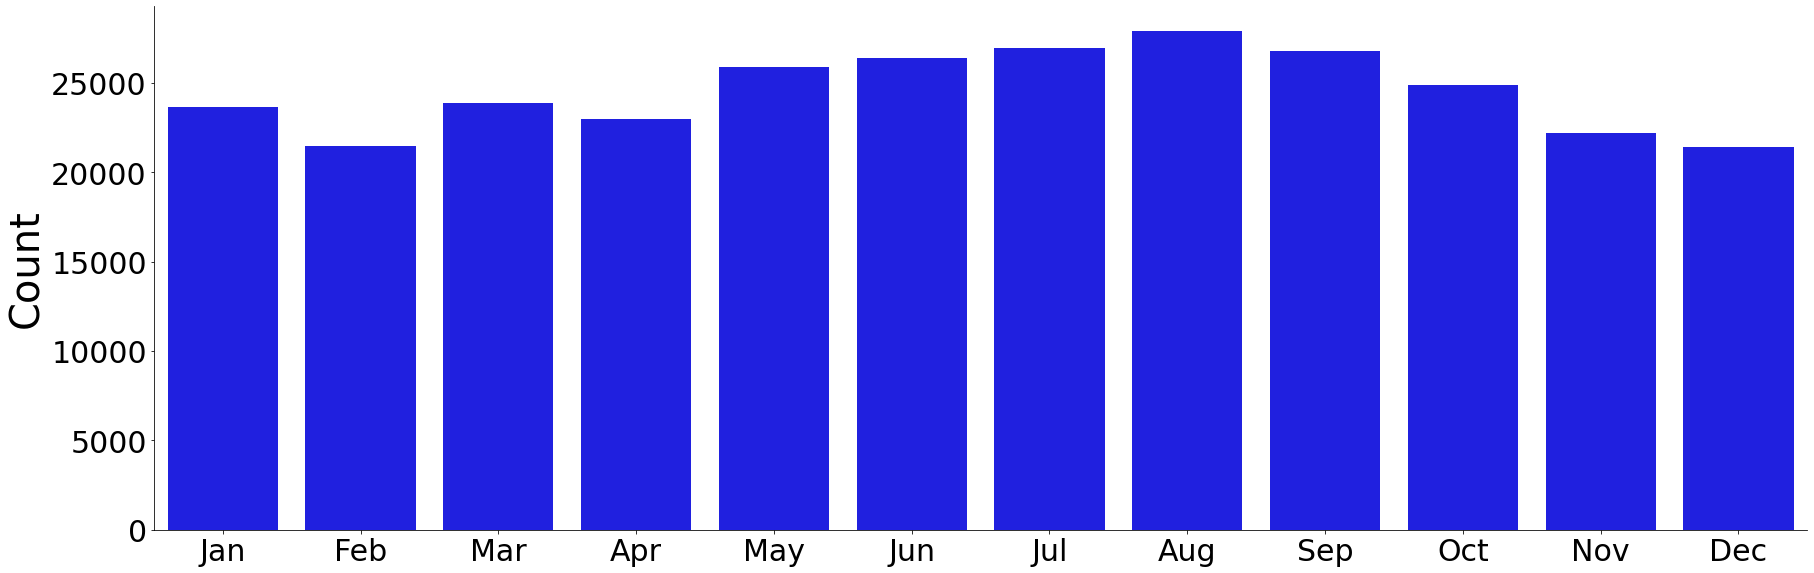

In [44]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.catplot(x='Month',
           kind='count',
            height=8, 
            aspect=3,
            color='blue',
           data=df)
plt.xticks(np.arange(12), months, size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)
plt.show()

## Crime by day in a week

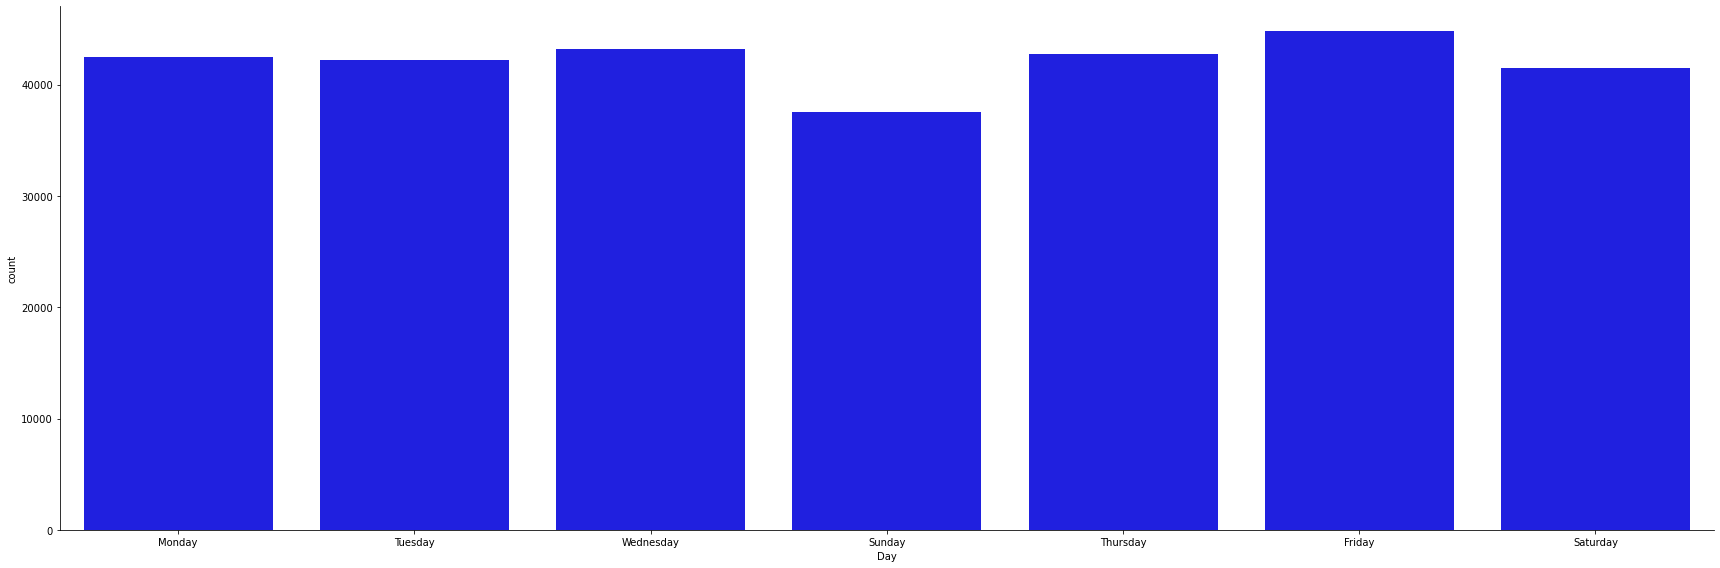

In [45]:
sns.catplot(x='Day',
           kind='count',
            height=8, 
            aspect=3,
            color='blue',
           data=df)

plt.show()